In [1]:
import numpy as np
import pandas as pd
import os
import glob
import pathlib

np.set_printoptions(formatter={'float': '{: 0.3f}'.format})

In [2]:
import yfinance as yf
from yahoofinancials import YahooFinancials

In [3]:
file = pathlib.Path("../stock/")
if file.exists ():
    print ("File exist")
else:
    print ("File not exist")

File exist


In [4]:
from sklearn.naive_bayes import GaussianNB, ComplementNB, CategoricalNB
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.linear_model import SGDRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split # for train-test split 
from sklearn.preprocessing import StandardScaler # for feature scaling
from sklearn.model_selection import GridSearchCV # for fine-tuning
from sklearn.metrics import classification_report, confusion_matrix, plot_roc_curve # for evaluation
from sklearn import metrics
from sklearn.pipeline import make_pipeline # for prediction

In [5]:
# for Generator
from scipy import stats # for sampling
# from fitter import Fitter # for fitting the best distribution
import copy # for copying nested dictionaries

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline

# set style of graphs
plt.style.use('seaborn')
from pylab import rcParams
plt.rcParams['figure.dpi'] = 100

In [7]:
def evaluate(model, input, prediction):
    errors = abs(prediction - input)
    mape = 100 * np.mean(errors / input)
    accuracy = 100 - mape
    print('Model Performance')
    print('Average Error: {:0.4f} degrees.'.format(np.mean(errors)))
    print('Accuracy = {:0.2f}%.'.format(accuracy))
    
    return accuracy

In [8]:
sc = StandardScaler()

In [9]:
data = pd.read_csv('../stock/AAPL.csv')
X = data[['Open', 'High', 'Low']]
y = data['Close']

In [10]:
X_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42, shuffle=False)

In [11]:
x_test

,Open,High,Low
791,164.979996,166.690002,162.149994
792,165.539993,166.149994,159.750000
793,152.580002,162.850006,152.000000
794,163.839996,165.119995,160.869995
795,163.059998,165.419998,162.429993
...,...,...,...
984,145.139999,146.639999,143.380005
985,144.289993,144.809998,140.350006
986,141.399994,148.720001,140.550003
987,148.210007,149.130005,146.610001


## Random forest 

In [12]:
dict = {'x': 2, 'y':'3'}
for key, value in dict.items():
    print(dict[key])

2
3


In [13]:
random_forest = RandomForestRegressor(max_depth=50, n_estimators=200)

# Train the model using the training sets y_pred=clf.predict(X_test)
random_forest.fit(y=y_train, X=X_train)

y_pred = random_forest.predict(x_test)

In [14]:
evaluate(random_forest, y_test, y_pred)

Model Performance
Average Error: 1.3491 degrees.
Accuracy = 99.11%.


99.11389795162624

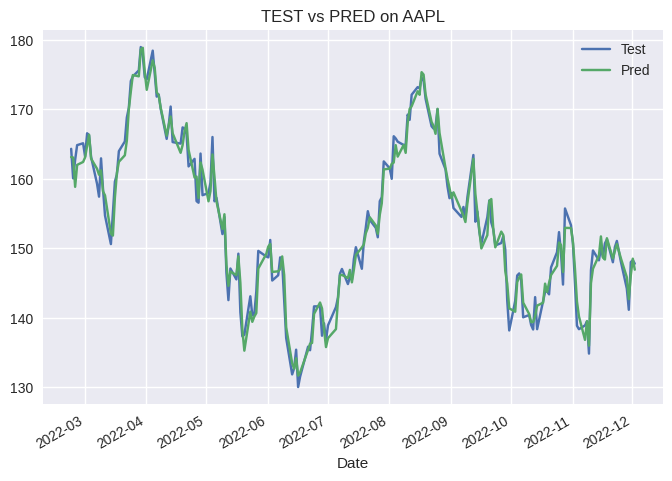

In [15]:
df_y_test = pd.DataFrame({'Date': pd.to_datetime(data.Date[(len(data)-len(y_test)):], utc=True), 'Close': y_test})
df_y_test.set_index('Date', inplace=True)
df_y_pred = pd.DataFrame({'Date': pd.to_datetime(data.Date[(len(data)-len(y_test)):], utc=True), 'Close': y_pred})
df_y_pred.set_index('Date', inplace=True)

fig, ax = plt.subplots()

df_y_test['Close'].plot(label='Test')
df_y_pred['Close'].plot(label='Pred')

plt.title('TEST vs PRED on AAPL')
# adding Label to the x-axis
plt.xlabel('Date')
  
# adding legend to the curve
plt.legend()

In [28]:
random_forest.predict(np.array([143.14, 153.2, 132.9]).reshape(1,-1))

/home/silvio/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


array([ 142.446])

In [16]:
parameters_rf = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_depth': [10, 50, 100, 150],
    'min_samples_leaf': [1, 2, 4],
    'min_samples_split': [2, 5, 10],
    'bootstrap': [True, False]
    }

# Create a base model
random_search_rf = GridSearchCV(random_forest, parameters_rf, verbose=2, scoring='accuracy', 
                            n_jobs = -1, return_train_score=True)

In [17]:
# random_search_rf.fit(x_train, y_train)

In [18]:
 # rf_random.best_estimator_

## Stochastic Gradient Descent

In [19]:
param_grid = {
            'alpha':[0.0001,0.001],
            'loss': ['squared_error', 'huber', 'epsilon_insensitive']
            }

In [20]:
sgd = SGDRegressor()
sgd.fit(X_train, y_train)

SGDRegressor()

In [21]:
x_test

,Open,High,Low
791,164.979996,166.690002,162.149994
792,165.539993,166.149994,159.750000
793,152.580002,162.850006,152.000000
794,163.839996,165.119995,160.869995
795,163.059998,165.419998,162.429993
...,...,...,...
984,145.139999,146.639999,143.380005
985,144.289993,144.809998,140.350006
986,141.399994,148.720001,140.550003
987,148.210007,149.130005,146.610001


In [22]:
y_pred = sgd.predict(x_test)

In [23]:
y_pred

array([-9154563022793.816, -9148562808869.250, -7627695277190.248,
       -9128326504064.381, -9090713344547.918, -9123072714537.291,
       -9057506121035.613, -9489137519507.537, -9220724532133.590,
       -8987130485332.980, -8533570911739.438, -8969681012775.533,
       -8970795349969.412, -8869013279097.080, -8350018559789.556,
       -8144667842563.563, -8575649937571.341, -8812539822387.309,
       -8761972657225.338, -9071238772842.178, -9064396653772.094,
       -9140400161388.768, -9461055776324.273, -9791600013536.117,
       -9508968881574.393, -9894764197955.701, -10059062186726.021,
       -10028070640197.750, -9808898538123.771, -9610037035507.254,
       -9961231595084.021, -9659483611602.184, -9538168998272.234,
       -9745840221491.367, -9500542687914.158, -9391803664948.492,
       -9199911683639.057, -9447895512900.623, -9120302520601.520,
       -9129943154603.830, -9554610786246.840, -9272540708633.947,
       -9158667888684.691, -8904348074715.588, -902972718395

In [24]:
evaluate(sgd, y_test, y_pred)

Model Performance
Average Error: 8490348398551.2109 degrees.
Accuracy = -5518599480438.98%.


-5518599480438.98

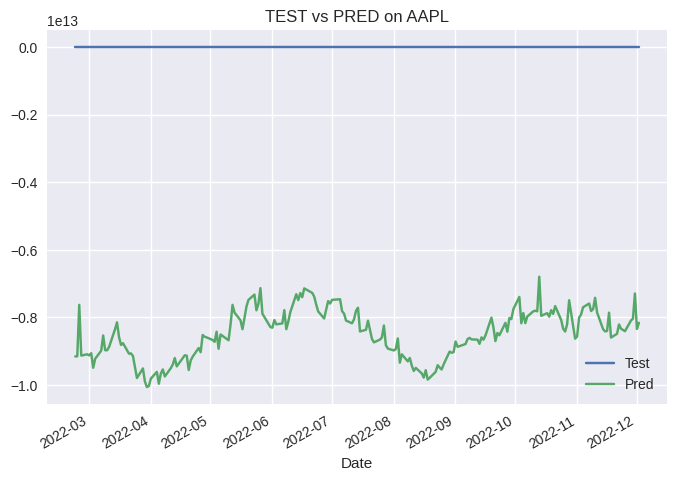

In [25]:
df_y_test = pd.DataFrame({'Date': pd.to_datetime(data.Date[(len(data)-len(y_test)):], utc=True), 'Close': y_test})
df_y_test.set_index('Date', inplace=True)
df_y_pred = pd.DataFrame({'Date': pd.to_datetime(data.Date[(len(data)-len(y_test)):], utc=True), 'Close': y_pred})
df_y_pred.set_index('Date', inplace=True)

fig, ax = plt.subplots()

df_y_test['Close'].plot(label='Test')
df_y_pred['Close'].plot(label='Pred')

plt.title('TEST vs PRED on AAPL')
# adding Label to the x-axis
plt.xlabel('Date')
  
# adding legend to the curve
plt.legend()

In [26]:
data.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
984,2022-11-28 00:00:00-05:00,145.139999,146.639999,143.380005,144.220001,144.220001,69246000
985,2022-11-29 00:00:00-05:00,144.289993,144.809998,140.350006,141.169998,141.169998,83763800
986,2022-11-30 00:00:00-05:00,141.399994,148.720001,140.550003,148.029999,148.029999,111224400
987,2022-12-01 00:00:00-05:00,148.210007,149.130005,146.610001,148.309998,148.309998,71250400
988,2022-12-02 00:00:00-05:00,145.960007,148.000000,145.649994,147.809998,147.809998,65421400


In [32]:
ref = 1025 # So that x_i+1 - x_i is exactly representable in base 2
x = np.linspace(0,1,ref)

n = 5 # Polynomials of order 5, with dimension 6

# We compute the basis of Pn row-wise. This is memory efficient if we want to access
# all the values of the basis at once. 
Pn = np.zeros((ref, n+1))

for i in range(n+1):
    Pn[:, i] = x**i
    
# The _ = in front of the plot command is only there to ignore the output of the plot
# command
_ = plt.plot(x, Pn)